In [ ]:
Librerias

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit, golden

In [ ]:
Graficar Puntos

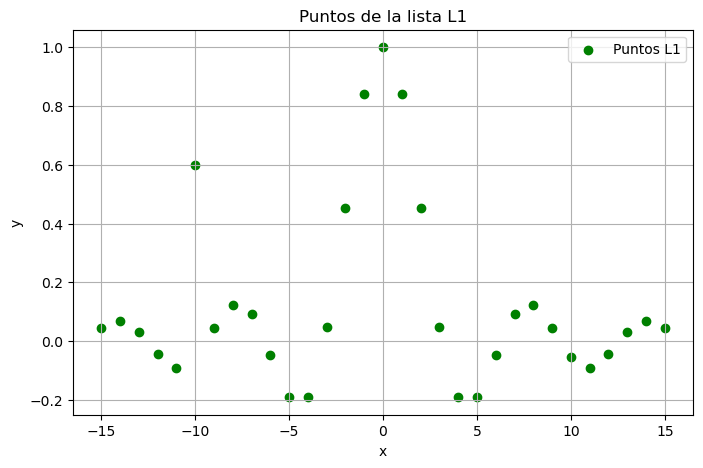

In [37]:
import re
import numpy as np
import matplotlib.pyplot as plt
import os

# Definir la ruta completa al archivo en Windows
ruta_archivo = r"C:\Users\totoe\Desktop\5to semestre\Listas de puntos para el proyecto.txt"

if os.path.exists(ruta_archivo):
    with open(ruta_archivo, 'r', encoding='utf-8') as file:
        contenido = file.read()

    # Extraer puntos usando expresiones regulares (para L1)
    lista_puntos = re.findall(r'L1\s*=\s*\{(.*?)\};', contenido, re.DOTALL)[0]

    pares = re.findall(r'\{([^,]+),\s*([^\}]+)\}', lista_puntos)

    # Convertir a Float
    x_data = np.array([float(p[0]) for p in pares])
    y_data = np.array([float(p[1]) for p in pares])

    # Gráfica
    plt.figure(figsize=(8, 5))
    plt.scatter(x_data, y_data, color='green', label='Puntos L1')
    plt.title("Puntos de la lista L1")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.legend()
    plt.show()
else:
    print(f"El archivo no fue encontrado en la ruta: {ruta_archivo}")


In [ ]:
Ajuste de Curva

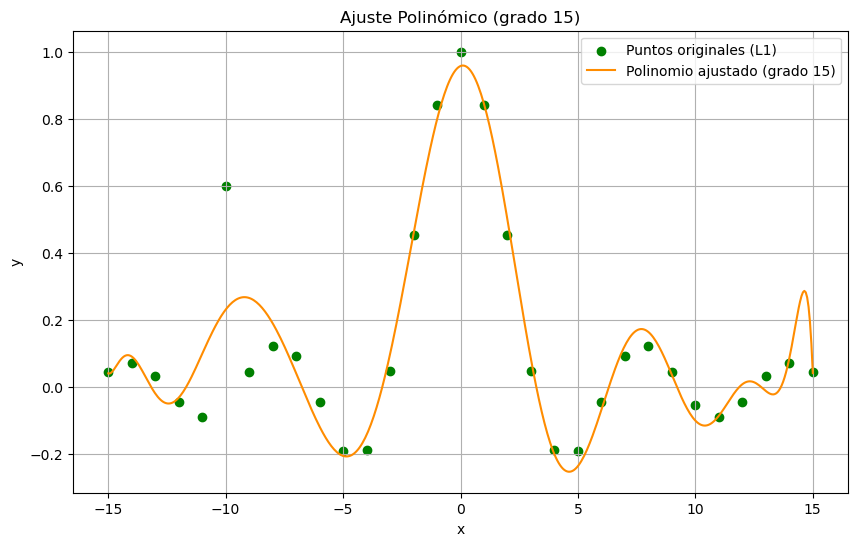

Coeficientes del polinomio (de mayor a menor grado):

[-2.02911170e-15 -2.03673823e-14  1.68072357e-12  1.75779511e-11
 -5.51965745e-10 -6.17872081e-09  9.09582850e-08  1.13170364e-06
 -7.82641231e-06 -1.13963302e-04  3.31590593e-04  6.03750372e-03
 -5.88697593e-03 -1.42285554e-01  2.86547264e-02  9.57357492e-01]


In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Datos originales
x_data = np.array([-15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3,
                   -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

y_data = np.array([0.043, 0.070, 0.032, -0.0447, -0.090, 0.6, 0.045, 0.123,
                   0.093, -0.046, -0.191, -0.189, 0.047, 0.454, 0.841, 1, 0.841,
                   0.454, 0.047, -0.189, -0.191, -0.046, 0.093, 0.123, 0.045,
                   -0.054, -0.090, -0.044, 0.032, 0.070, 0.043])

# Ajuste de curva polinómico
grado = 15
coeficientes = np.polyfit(x_data, y_data, grado)
polinomio_ajustado = np.poly1d(coeficientes)

# Generar puntos suaves para la curva ajustada
x_curva = np.linspace(min(x_data), max(x_data), 500)
y_curva = polinomio_ajustado(x_curva)

# Gráfica
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='green', label='Puntos originales (L1)')
plt.plot(x_curva, y_curva, color='darkorange', label=f'Polinomio ajustado (grado {grado})')
plt.title("Ajuste Polinómico (grado 15)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

# Mostrar coeficientes del polinomio
print("Coeficientes del polinomio (de mayor a menor grado):\n")
print(coeficientes)



In [ ]:
Que funcion nos da?

In [27]:
funcion_str = "f(x) = "
for i, coef in enumerate(polinomio_ajustado.coefficients):
    exp = len(polinomio_ajustado.coefficients) - i - 1
    signo = " + " if coef >= 0 else " - "
    coef_abs = abs(coef)
    if exp > 1:
        funcion_str += f"{signo}{coef_abs:.6e}·x^{exp}"
    elif exp == 1:
        funcion_str += f"{signo}{coef_abs:.6e}·x"
    else:
        funcion_str += f"{signo}{coef_abs:.6e}"

print(funcion_str.lstrip(" +"))


f(x) =  - 2.029112e-15·x^15 - 2.036738e-14·x^14 + 1.680724e-12·x^13 + 1.757795e-11·x^12 - 5.519657e-10·x^11 - 6.178721e-09·x^10 + 9.095829e-08·x^9 + 1.131704e-06·x^8 - 7.826412e-06·x^7 - 1.139633e-04·x^6 + 3.315906e-04·x^5 + 6.037504e-03·x^4 - 5.886976e-03·x^3 - 1.422856e-01·x^2 + 2.865473e-02·x + 9.573575e-01


In [ ]:
Maximo utilizando el Metodo de la seccion dorada en el intervalo "[-4,2]"

In [48]:
import numpy as np

f = polinomio_ajustado

R = (np.sqrt(5) - 1) / 2  # ≈ 0.6180339887

# Intervalo de búsqueda dado
xa = -4
xb = 2

tolerancia = 1e-5
iteracion = 0

# Para guardar datos de cada paso
historial = []

# Algoritmo de la sección dorada 
while abs(xb - xa) > tolerancia:
    d = R * (xb - xa)
    x1 = xb - d
    x2 = xa + d
    f1 = f(x1)
    f2 = f(x2)

    historial.append((iteracion, xa, x1, x2, xb, f1, f2))

    if f1 > f2:
        xb = x2
    else:
        xa = x1
    
    iteracion += 1

# Resultado final
x_max = (xa + xb) / 2
y_max = f(x_max)

print(f"Máximo encontrado usando sección dorada:")
print(f"Intervalo: [-4, 2]")
print(f"Iteraciones: {iteracion}")
print(f"x ≈ {x_max:.6f}")
print(f"y ≈ {y_max:.6f}")


Máximo encontrado usando sección dorada:
Intervalo: [-4, 2]
Iteraciones: 28
x ≈ 0.100158
y ≈ 0.958795
